In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('ADANIPORTS.csv')
# data
df = data[[ "Prev Close", "Open", "High", "Low", "Close","Volume"]]
# df = df.dropna()
df


,Prev Close,Open,High,Low,Close,Volume
0,440.00,770.00,1050.00,770.00,962.90,27294366
1,962.90,984.00,990.00,874.00,893.90,4581338
2,893.90,909.00,914.75,841.00,884.20,5124121
3,884.20,890.00,958.00,890.00,921.55,4609762
4,921.55,939.75,995.00,922.00,969.30,2977470
...,...,...,...,...,...,...
2988,366.90,368.00,372.00,366.00,368.60,2948878
2989,368.60,368.80,370.60,362.10,363.65,2503435
2990,363.65,366.75,367.90,362.80,363.70,2146972
2991,363.70,371.00,371.00,363.75,365.95,4732203


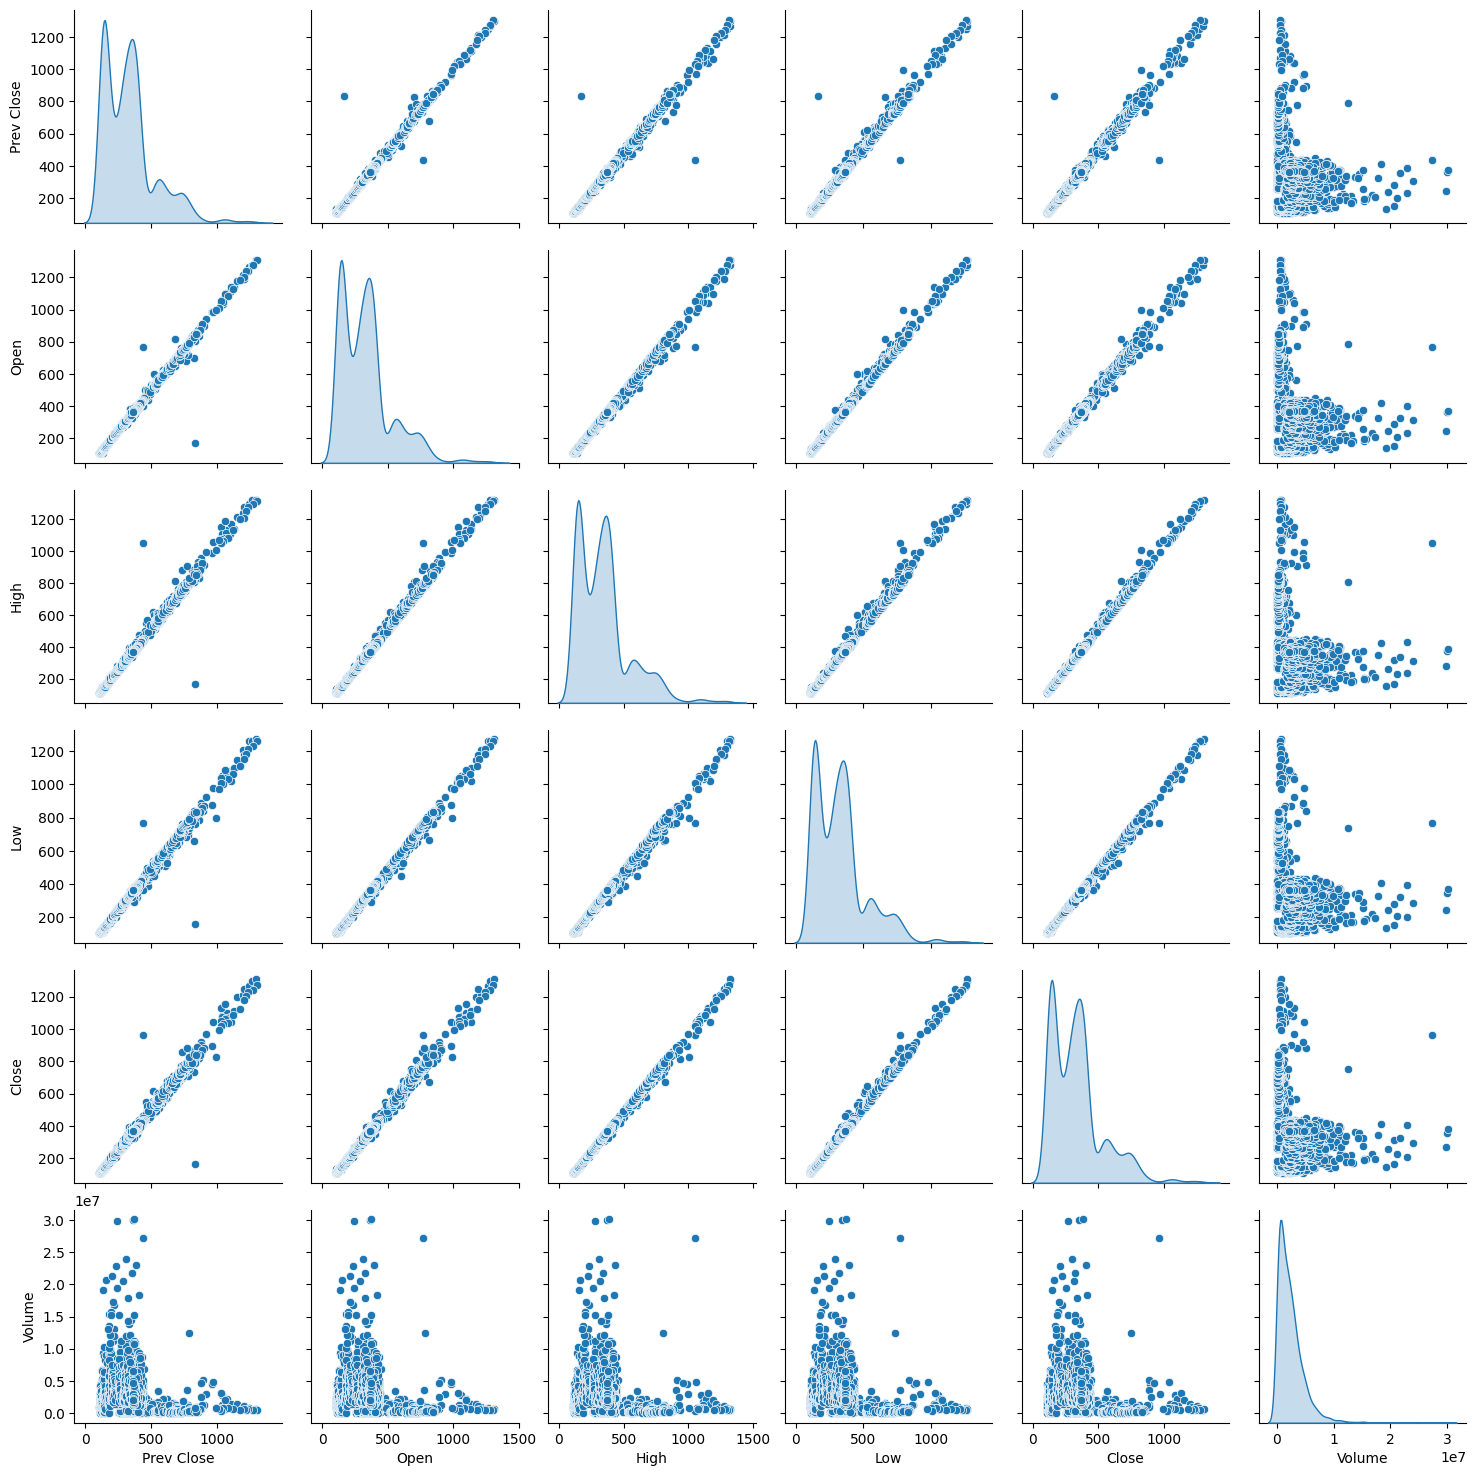

In [13]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [43]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(df)
training_set_scaled = pd.DataFrame(training_set_scaled, columns=[ "Prev Close", "Open", "High","Close", "Low","Volume"])
training_set_scaled

,Prev Close,Open,High,Close,Low,Volume
0,0.276794,0.550634,0.774216,0.570576,0.712743,0.906412
1,0.712743,0.728634,0.724774,0.659896,0.655217,0.151799
2,0.655217,0.666251,0.662766,0.631554,0.647130,0.169832
3,0.647130,0.650447,0.698406,0.673638,0.678269,0.152743
4,0.678269,0.691828,0.728895,0.701121,0.718079,0.098512
...,...,...,...,...,...,...
2988,0.215849,0.216261,0.215525,0.223601,0.217266,0.097562
2989,0.217266,0.216927,0.214371,0.220252,0.213139,0.082763
2990,0.213139,0.215221,0.212146,0.220853,0.213181,0.070920
2991,0.213181,0.218756,0.214701,0.221669,0.215057,0.156811


In [44]:
train_data = training_set_scaled.iloc[:int(.30*len(df)),:]
test_data =  training_set_scaled.iloc[int(.70*len(df)):,:]
features = ['Open','High']
target = 'Close'


In [45]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(train_data[features].shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(train_data[features],train_data[target],epochs=100,batch_size=32)

Epoch 1/100
29/29 [==============================] - 8s 9ms/step - loss: 0.0959
Epoch 2/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0323
Epoch 3/100
29/29 [==============================] - 0s 14ms/step - loss: 0.0133
Epoch 4/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0048
Epoch 5/100
29/29 [==============================] - 0s 14ms/step - loss: 0.0034
Epoch 6/100
29/29 [==============================] - 0s 14ms/step - loss: 0.0028
Epoch 7/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0024
Epoch 8/100
29/29 [==============================] - 0s 10ms/step - loss: 0.0030
Epoch 9/100
29/29 [==============================] - 0s 10ms/step - loss: 0.0021
Epoch 10/100
29/29 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 11/100
29/29 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 12/100
29/29 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 13/100
29/29 [=======

In [47]:
ypred = model.predict(test_data[features])
accuracy = mean_squared_error(ypred,test_data[target])
# print(ypred)
# print(test_data[target])
accuracy

29/29 [==============================] - 0s 5ms/step


3.729522562996341e-05